In [203]:
## Code from https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817
## Code from https://machinelearningmastery.com/making-predictions-with-multilinear-regression-in-pytorch/

In [204]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

## EDA

In [205]:
## import data from the master folder
data = pd.read_csv(r'C:\Users\Siyang\Documents\GitHub\Fantasy-Premier-League\data\2023-24\gws\merged_gw.csv')

In [206]:
data.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Femi Seriki,DEF,Sheffield Utd,0.5,0,0,0,0,0.0,653,...,0,0.0,0,0,0,0,40,True,0,1
1,Jack Hinshelwood,MID,Brighton,1.5,0,0,0,0,0.0,621,...,4,0.0,0,0,0,0,45,True,0,1
2,Jadon Sancho,MID,Man Utd,3.0,0,0,4,0,11.3,397,...,1,8.0,1,0,0,0,70,True,0,1
3,Rhys Norrington-Davies,DEF,Sheffield Utd,0.1,0,0,0,0,0.0,487,...,0,0.0,0,0,0,0,40,True,0,1
4,Vitaly Janelt,MID,Brentford,2.1,0,0,6,0,11.5,105,...,2,17.0,2,0,0,0,55,True,0,1


In [207]:
selected_gameweeks = [1,2,3,4,5] ## filter by round in database
filter_by_gw = data[data['round'].isin(selected_gameweeks)]
filter_by_gw

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Femi Seriki,DEF,Sheffield Utd,0.5,0,0,0,0,0.0,653,...,0,0.0,0,0,0,0,40,True,0,1
1,Jack Hinshelwood,MID,Brighton,1.5,0,0,0,0,0.0,621,...,4,0.0,0,0,0,0,45,True,0,1
2,Jadon Sancho,MID,Man Utd,3.0,0,0,4,0,11.3,397,...,1,8.0,1,0,0,0,70,True,0,1
3,Rhys Norrington-Davies,DEF,Sheffield Utd,0.1,0,0,0,0,0.0,487,...,0,0.0,0,0,0,0,40,True,0,1
4,Vitaly Janelt,MID,Brentford,2.1,0,0,6,0,11.5,105,...,2,17.0,2,0,0,0,55,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,Kyle Walker,DEF,Man City,3.0,0,0,20,0,34.2,369,...,1,4.0,2,64591,135320,70729,52,False,0,5
3354,Jacob Brown,FWD,Luton,0.5,0,0,12,0,24.5,631,...,1,10.0,2,-841,1244,2085,49,False,0,5
3355,Vicente Guaita,GK,Crystal Palace,0.0,0,0,0,0,0.0,227,...,3,0.0,0,-14708,10,14718,44,False,0,5
3356,Braian Ojeda Rodríguez,MID,Nott'm Forest,0.0,0,0,0,0,0.0,459,...,1,0.0,0,-29,0,29,45,True,0,5


In [208]:
selected_attributes = ['element','goals_scored', 'assists',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards','total_points','round']

In [209]:
filter_by_gw_attributes = filter_by_gw[selected_attributes]
filter_by_gw_attributes

,element,goals_scored,assists,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,total_points,round
0,653,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,1
1,621,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,1
2,397,0,0,22,0,11.3,3.8,8.0,0,4,2.3,0,0,0,1,1
3,487,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,1
4,105,0,0,90,2,11.5,14.6,17.0,0,6,4.3,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,369,0,0,90,1,34.2,20.2,4.0,0,20,5.8,0,0,0,2,5
3354,631,0,0,73,1,24.5,14.2,10.0,0,12,4.9,0,0,0,2,5
3355,227,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,5
3356,459,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,5


In [210]:
filter_by_gw_attributes.shape

(3358, 16)

In [211]:
# train_input_tensor = np.zeros((max(filter_by_gw_attributes['element']), len(selected_gameweeks), filter_by_gw_attributes.shape[1]-3))
inputs = np.zeros((max(filter_by_gw_attributes['element']), len(selected_gameweeks) - 1))
labels = np.zeros(max(filter_by_gw_attributes['element']))

for i in tqdm(range(filter_by_gw_attributes.shape[0])):
    for j in range(filter_by_gw_attributes.shape[1]-1):
        for k in selected_gameweeks:
            element = int(filter_by_gw_attributes.iloc[i][0]) - 1 # element indexing starts from 1
            # data = filter_by_gw_attributes.iloc[i][1:-2]
            total_points = filter_by_gw_attributes.iloc[i][-2]
            gw = int(filter_by_gw_attributes.iloc[i][-1]) - min(selected_gameweeks) # gameweek indexing can start from 1 to 38
            # train_input_tensor[element][gw] = data
            round = filter_by_gw_attributes.loc[i]['round']
            if round == selected_gameweeks[-1]: # if it is last round, thats data that we are supposed to predict
                labels[element] = total_points 
            else:
                inputs[element][gw] = total_points

100%|██████████| 3358/3358 [00:47<00:00, 70.85it/s]


In [212]:
print(inputs.shape)
print(labels.shape)

(718, 4)
(718,)


## Model Training

In [213]:
import torch # torch will allow us to create tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import Adam # optim contains many optimizers. This time we're using Adam

import lightning as L # lightning has tons of cool tools that make neural networks easier
from torch.utils.data import TensorDataset, DataLoader # these are needed for the training data

## Set the seed so that, hopefully, everyone will get the same results as me.
from pytorch_lightning.utilities.seed import seed_everything

In [223]:
inputs, labels = (torch.tensor(inputs), torch.tensor(labels))
inputs = inputs.to(torch.float32)
labels = labels.to(torch.float32)

C:\Users\siyang\AppData\Local\Temp\ipykernel_12576\1007522832.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = (torch.tensor(inputs), torch.tensor(labels))


In [226]:
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [227]:
## Instead of coding an LSTM by hand, let's see what we can do with PyTorch's nn.LSTM()
class LightningLSTM(L.LightningModule):

    def __init__(self): # __init__() is the class constructor function, and we use it to initialize the Weights and Biases.
        
        super().__init__() # initialize an instance of the parent class, LightningModule.

        seed_everything(seed=42)
        
        ## input_size = number of features (or variables) in the data. In our example
        ##              we only have a single feature (value)
        ## hidden_size = this determines the dimension of the output
        ##               in other words, if we set hidden_size=1, then we have 1 output node
        ##               if we set hiddeen_size=50, then we hve 50 output nodes (that can then be 50 input
        ##               nodes to a subsequent fully connected neural network.
        self.lstm = nn.LSTM(input_size=1, hidden_size=1) 
         

    def forward(self, input):
        ## transpose the input vector
        input_trans = input.view(len(input), 1)
        
        lstm_out, temp = self.lstm(input_trans)
        
        ## lstm_out has the short-term memories for all inputs. We make our prediction with the last one
        prediction = lstm_out[-1] 
        return prediction
        
        
    def configure_optimizers(self): # this configures the optimizer we want to use for backpropagation.
        return Adam(self.parameters(), lr=0.1) ## we'll just go ahead and set the learning rate to 0.1

    
    def training_step(self, batch, batch_idx): # take a step during gradient descent.
        input_i, label_i = batch # collect input
        output_i = self.forward(input_i[0]) # run input through the neural network
        loss = (output_i - label_i)**2 ## loss = squared residual
        
        ###################
        ##
        ## Logging the loss and the predicted values so we can evaluate the training
        ##
        ###################
        self.log("train_loss", loss)
        
        if (label_i == 0):
            self.log("out_0", output_i)
        else:
            self.log("out_1", output_i)

        return loss

In [228]:
model = LightningLSTM() # First, make model from the class

## print out the name and value for each parameter
print("Before optimization, the parameters are...")
for name, param in model.named_parameters():
    print(name, param.data)
    
print("\nNow let's compare the observed and predicted values...")
print("Company A: Observed = 0, Predicted =", model(torch.tensor([0., 0.5, 0.25, 1.])).detach())
print("Company B: Observed = 1, Predicted =", model(torch.tensor([1., 0.5, 0.25, 1.])).detach())

c:\Users\siyang\Documents\GitHub\data-driven-fpl\.venv\Lib\site-packages\pytorch_lightning\utilities\seed.py:48: `pytorch_lightning.utilities.seed.seed_everything` has been deprecated in v1.8.0 and will be removed in v1.10.0. Please use `lightning_lite.utilities.seed.seed_everything` instead.
Global seed set to 42


Before optimization, the parameters are...
lstm.weight_ih_l0 tensor([[ 0.7645],
        [ 0.8300],
        [-0.2343],
        [ 0.9186]])
lstm.weight_hh_l0 tensor([[-0.2191],
        [ 0.2018],
        [-0.4869],
        [ 0.5873]])
lstm.bias_ih_l0 tensor([ 0.8815, -0.7336,  0.8692,  0.1872])
lstm.bias_hh_l0 tensor([ 0.7388,  0.1354,  0.4822, -0.1412])

Now let's compare the observed and predicted values...
Company A: Observed = 0, Predicted = tensor([0.6675])
Company B: Observed = 1, Predicted = tensor([0.6665])


In [229]:
## NOTE: Because we have set Adam's learning rate to 0.1, we will train much, much faster.
## Before, with the hand made LSTM and the default learning rate, 0.001, it took about 5000 epochs to fully train
## the model. Now, with the learning rate set to 0.1, we only need 300 epochs. Now, because we are doing so few epochs,
## we have to tell the trainer add stuff to the log files every 2 steps (or epoch, since we have to rows of training data)
## because the default, updating the log files every 50 steps, will result in a terrible looking graphs. So
trainer = L.Trainer(max_epochs=300, log_every_n_steps=2)

trainer.fit(model, train_dataloaders=dataloader)

print("After optimization, the parameters are...")
for name, param in model.named_parameters():
    print(name, param.data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 16    
------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
c:\Users\siyang\Documents\GitHub\data-driven-fpl\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 12:  56%|█████▌    | 400/718 [00:02<00:01, 198.56it/s, v_num=3]After optimization, the parameters are...
lstm.weight_ih_l0 tensor([[1.4352],
        [4.6178],
        [2.9418],
        [8.7294]], device='cuda:0')
lstm.weight_hh_l0 tensor([[2.1996],
        [3.5316],
        [0.8235],
        [0.8758]], device='cuda:0')
lstm.bias_ih_l0 tensor([3.2205, 4.0953, 4.3947, 1.5296], device='cuda:0')
lstm.bias_hh_l0 tensor([3.0778, 4.9644, 4.0077, 1.2012], device='cuda:0')


c:\Users\siyang\Documents\GitHub\data-driven-fpl\.venv\Lib\site-packages\lightning\pytorch\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


## Result Analysis

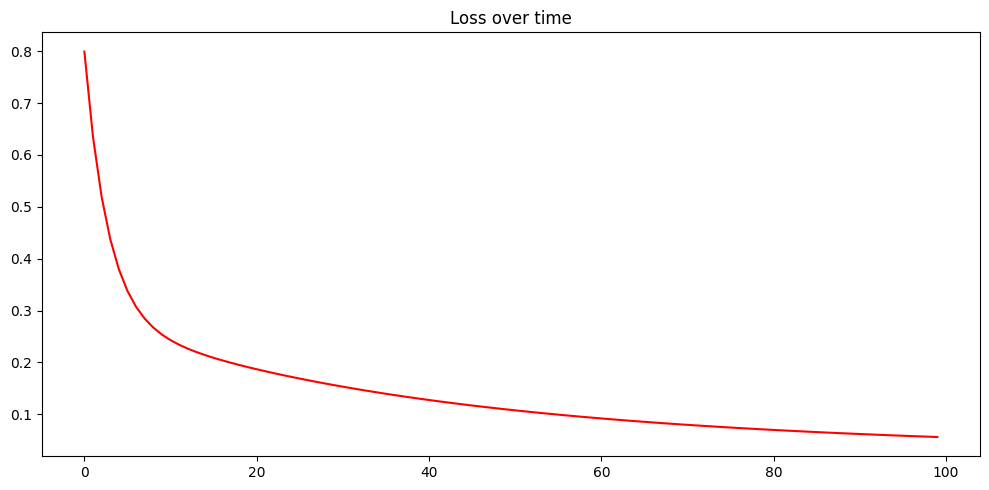

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

x = np.array([i for i in range(len(loss_array))])
y = np.array(loss_array)
plt.title("Loss over time")
plt.plot(x, y, color="red")

plt.show()

In [ ]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(inputs).cpu().data.numpy()
    else:
        predicted = model(inputs).data.numpy()
    print(predicted)

[[-0.72659826]
 [-0.72659826]
 [-0.69415534]
 [-0.14242496]
 [ 0.55451757]
 [ 1.0247351 ]
 [ 0.9135958 ]
 [-0.22223993]
 [-0.40349615]
 [-0.72659826]
 [ 1.332482  ]
 [ 1.4567181 ]
 [ 2.5481515 ]
 [-0.32559398]
 [-0.72659826]
 [-0.36823183]
 [-0.72659826]
 [ 3.592828  ]
 [ 1.2689797 ]
 [-0.57388693]
 [-0.72659826]
 [ 0.30866364]
 [ 1.0417385 ]
 [ 1.6098534 ]
 [-0.72659826]
 [ 1.654524  ]
 [ 0.22833079]
 [ 2.0188985 ]
 [-0.5656947 ]
 [-0.68665427]
 [-0.72659826]
 [-0.72659826]
 [-0.72659826]
 [-0.72659826]
 [-0.69818777]
 [ 1.6355839 ]
 [-0.72659826]
 [ 1.2956895 ]
 [-0.72659826]
 [-0.67208946]
 [-0.72659826]
 [-0.6696484 ]
 [ 0.05371488]
 [ 1.7294408 ]
 [ 3.2315667 ]
 [ 0.13051382]
 [-0.72659826]
 [-0.72659826]
 [ 0.9593441 ]
 [ 1.032706  ]
 [ 1.1974399 ]
 [ 2.4515703 ]
 [-0.64889807]
 [-0.67374897]
 [-0.6967819 ]
 [-0.42309073]
 [-0.72659826]
 [-0.72659826]
 [ 0.02508957]
 [-0.70202774]
 [ 3.5655813 ]
 [-0.72659826]
 [ 1.4046179 ]
 [ 1.8239924 ]
 [-0.72659826]
 [-0.72659826]
 [-0.42637

In [ ]:
total_points.head()

0     0
1     0
2     4
3    21
4    40
Name: total_points, dtype: int64

In [ ]:
(predicted * total_points.std() + total_points.mean())[0:5]

array([[ 1.3490744],
       [ 1.3490744],
       [ 2.0529022],
       [14.022323 ],
       [29.142025 ]], dtype=float32)